In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
plt.rc('font', family='malgun gothic')
plt.rcParams['axes.unicode_minus']=False

In [ ]:
df = pd.read_csv('군집7.csv', encoding='cp949', index_col=0)
df.drop(['고객ID'], axis=1, inplace=True)
df

,거주지,cluster,A_상반기_가구/인테리어_변화,B_상반기_가구/인테리어_변화,A_상반기_디지털/가전_변화,B_상반기_디지털/가전_변화,A_상반기_생활/건강_변화,B_상반기_생활/건강_변화,A_상반기_스포츠/레저_변화,B_상반기_스포츠/레저_변화,...,B_하반기_스포츠/레저_변화,A_하반기_식품_변화,B_하반기_식품_변화,A_하반기_패션의류_변화,B_하반기_패션의류_변화,A_하반기_패션잡화_변화,B_하반기_패션잡화_변화,A_하반기_화장품/미용_변화,B_하반기_화장품/미용_변화,구매감소
0,서울시,6,-100.000000,-100.0,0.000000,0.0,315.398707,95.736677,-89.206665,0.000000,...,0.0,38.165866,-33.128021,-36.252868,229.128440,-6.124604,9.197635,-97.745811,0.000000,True
1,강원도,6,458.833333,0.0,0.000000,0.0,-68.156313,-67.096377,0.000000,-86.756757,...,0.0,-66.721886,15.417325,5.471029,-16.732026,353.000000,-25.000000,-80.937404,-57.507673,False
2,서울시,6,-7.225352,0.0,0.000000,0.0,1220.000000,175.584462,-79.816277,-100.000000,...,0.0,12.152325,-99.622139,-33.755887,0.000000,-89.187595,-100.000000,934.444444,0.000000,False
3,경기도,6,0.000000,0.0,310.762724,0.0,392.873684,0.000000,-67.234758,0.000000,...,0.0,149.433975,0.000000,-53.825702,0.000000,54.685786,0.000000,370.517802,0.000000,False
4,서울시,6,0.000000,0.0,0.000000,0.0,-100.000000,0.000000,-100.000000,0.000000,...,0.0,-62.386286,-55.704908,754.358974,0.000000,162.500000,0.000000,-71.832669,375.860000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15893,서울시,5,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,279.925000,0.000000,0.000000,0.000000,-27.051567,0.000000,0.000000,0.000000,False
15894,서울시,5,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False
15895,부산시,1,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False
15896,부산시,1,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,False


<AxesSubplot:>

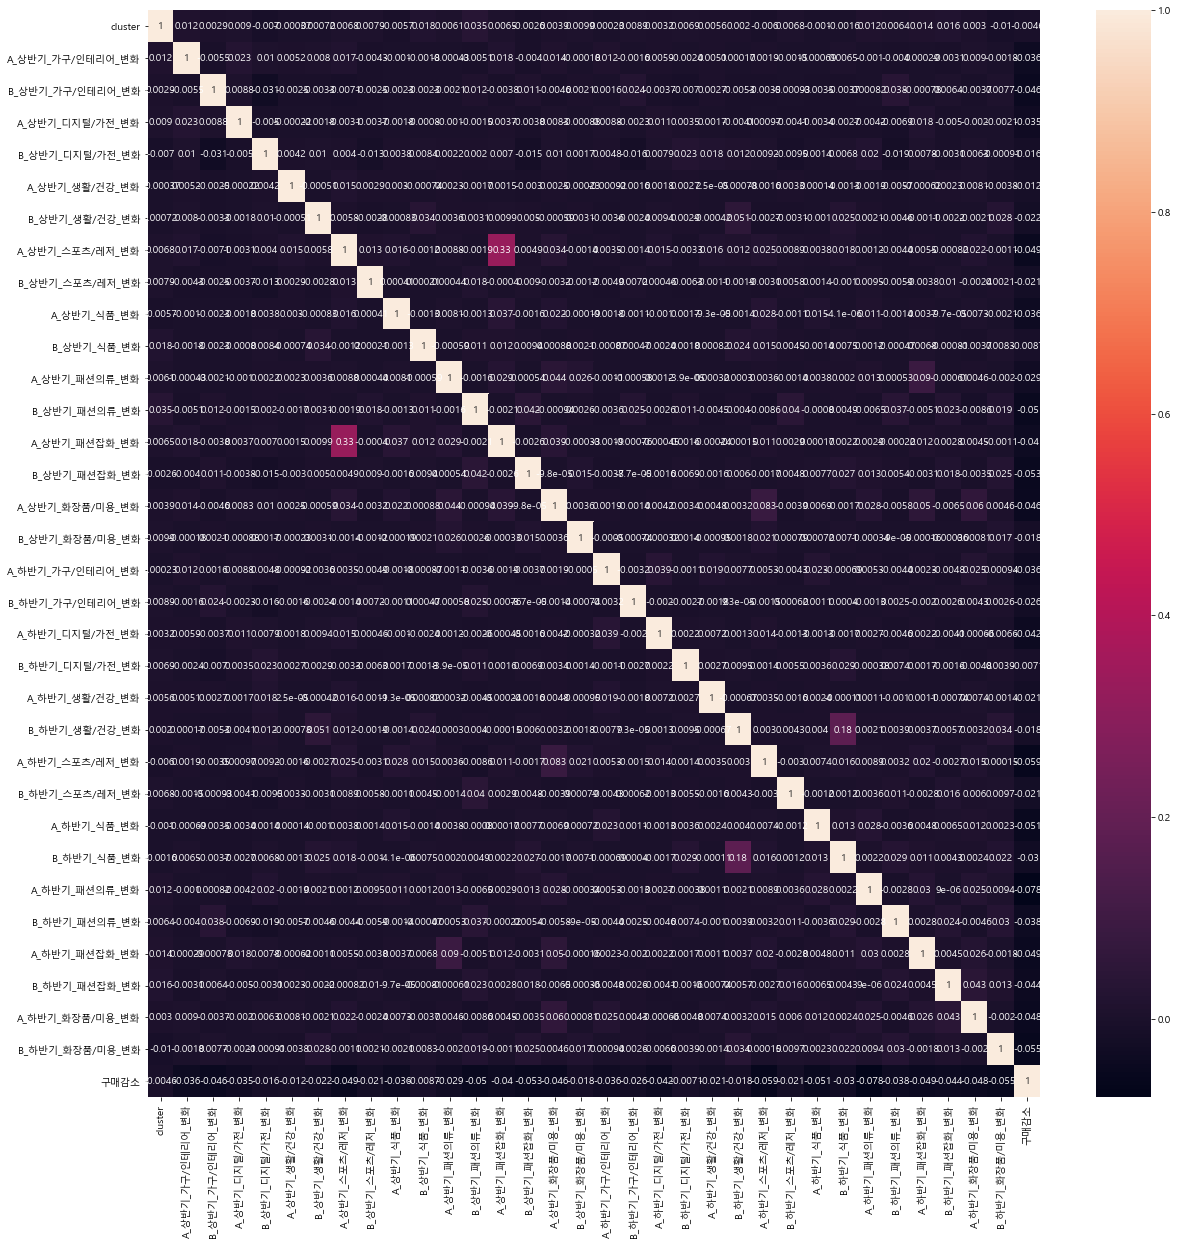

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [ ]:
#카테고리형 원핫인코딩
df = pd.get_dummies(df)
df.columns

Index(['cluster', 'A_상반기_가구/인테리어_변화', 'B_상반기_가구/인테리어_변화', 'A_상반기_디지털/가전_변화',
       'B_상반기_디지털/가전_변화', 'A_상반기_생활/건강_변화', 'B_상반기_생활/건강_변화',
       'A_상반기_스포츠/레저_변화', 'B_상반기_스포츠/레저_변화', 'A_상반기_식품_변화', 'B_상반기_식품_변화',
       'A_상반기_패션의류_변화', 'B_상반기_패션의류_변화', 'A_상반기_패션잡화_변화', 'B_상반기_패션잡화_변화',
       'A_상반기_화장품/미용_변화', 'B_상반기_화장품/미용_변화', 'A_하반기_가구/인테리어_변화',
       'B_하반기_가구/인테리어_변화', 'A_하반기_디지털/가전_변화', 'B_하반기_디지털/가전_변화',
       'A_하반기_생활/건강_변화', 'B_하반기_생활/건강_변화', 'A_하반기_스포츠/레저_변화',
       'B_하반기_스포츠/레저_변화', 'A_하반기_식품_변화', 'B_하반기_식품_변화', 'A_하반기_패션의류_변화',
       'B_하반기_패션의류_변화', 'A_하반기_패션잡화_변화', 'B_하반기_패션잡화_변화', 'A_하반기_화장품/미용_변화',
       'B_하반기_화장품/미용_변화', '구매감소', '거주지_강원도', '거주지_경기도', '거주지_경상남도', '거주지_경상북도',
       '거주지_광주시', '거주지_대구시', '거주지_대전시', '거주지_부산시', '거주지_서울시', '거주지_세종시',
       '거주지_울산시', '거주지_인천시', '거주지_전라남도', '거주지_전라북도', '거주지_제주시', '거주지_충청남도',
       '거주지_충청북도'],
      dtype='object')

In [ ]:
# 훈련용, 테스트용 데이터 나누기
X_data = df.drop('구매감소', axis=1)
y_data = df['구매감소']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, stratify= y_data)

In [ ]:
# 빠르게 각 분류기별로 교차검증
estimators = (DecisionTreeClassifier(), RandomForestClassifier(), LGBMClassifier(), XGBClassifier())
for classifier in estimators:
    accuracy = cross_val_score(classifier, X_data, y_data, scoring='precision', cv=5, n_jobs=-1).mean()
    precision = cross_val_score(classifier, X_data, y_data, scoring='precision', cv=5, n_jobs=-1).mean()
    recall = cross_val_score(classifier, X_data, y_data, scoring='precision', cv=5, n_jobs=-1).mean()
    f1 = cross_val_score(classifier, X_data, y_data, scoring='precision', cv=5, n_jobs=-1).mean()
    auc = cross_val_score(classifier, X_data, y_data, scoring='roc_auc', cv=5, n_jobs=-1).mean()

    print(classifier.__class__)
    print('정확도', accuracy.round(4))
    print('정밀도', precision.round(4))
    print('재현율', recall.round(4))
    print('f1', f1.round(4))
    print('auc', auc.round(4))

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
정확도 0.6219
정밀도 0.6257
재현율 0.625
f1 0.6235
auc 0.6613
<class 'sklearn.ensemble._forest.RandomForestClassifier'>
정확도 0.7593
정밀도 0.7633
재현율 0.7617
f1 0.7633
auc 0.85
<class 'lightgbm.sklearn.LGBMClassifier'>
정확도 0.7713
정밀도 0.7713
재현율 0.7713
f1 0.7713
auc 0.8656
<class 'xgboost.sklearn.XGBClassifier'>
정확도 0.7629
정밀도 0.7629
재현율 0.7629
f1 0.7629
auc 0.8537


In [ ]:
# 분류기 평가 함수
def eval_clf(y_test, pred, pred_proba):
    metrics_name = ('정확도', '정밀도', '재현율','f1', 'roc auc')
    rf_metrics = (accuracy_score(y_test, pred),
    precision_score(y_test, pred),
    recall_score(y_test, pred),
    f1_score(y_test, pred),
    roc_auc_score(y_test, pred_proba))

    for i in zip(metrics_name, rf_metrics):
        print(i[0], np.round(i[1], 2))

In [ ]:
# 랜덤포레스트 사용
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
pred_proba = rf_clf.predict_proba(X_test)[:, 1]

In [ ]:
eval_clf(y_test, pred, pred_proba)

정확도 0.78
정밀도 0.77
재현율 0.7
f1 0.73
roc auc 0.85


In [ ]:
X_data.columns

Index(['cluster', 'A_상반기_가구/인테리어_변화', 'B_상반기_가구/인테리어_변화', 'A_상반기_디지털/가전_변화',
       'B_상반기_디지털/가전_변화', 'A_상반기_생활/건강_변화', 'B_상반기_생활/건강_변화',
       'A_상반기_스포츠/레저_변화', 'B_상반기_스포츠/레저_변화', 'A_상반기_식품_변화', 'B_상반기_식품_변화',
       'A_상반기_패션의류_변화', 'B_상반기_패션의류_변화', 'A_상반기_패션잡화_변화', 'B_상반기_패션잡화_변화',
       'A_상반기_화장품/미용_변화', 'B_상반기_화장품/미용_변화', 'A_하반기_가구/인테리어_변화',
       'B_하반기_가구/인테리어_변화', 'A_하반기_디지털/가전_변화', 'B_하반기_디지털/가전_변화',
       'A_하반기_생활/건강_변화', 'B_하반기_생활/건강_변화', 'A_하반기_스포츠/레저_변화',
       'B_하반기_스포츠/레저_변화', 'A_하반기_식품_변화', 'B_하반기_식품_변화', 'A_하반기_패션의류_변화',
       'B_하반기_패션의류_변화', 'A_하반기_패션잡화_변화', 'B_하반기_패션잡화_변화', 'A_하반기_화장품/미용_변화',
       'B_하반기_화장품/미용_변화', '거주지_강원도', '거주지_경기도', '거주지_경상남도', '거주지_경상북도',
       '거주지_광주시', '거주지_대구시', '거주지_대전시', '거주지_부산시', '거주지_서울시', '거주지_세종시',
       '거주지_울산시', '거주지_인천시', '거주지_전라남도', '거주지_전라북도', '거주지_제주시', '거주지_충청남도',
       '거주지_충청북도'],
      dtype='object')

In [ ]:
rf_clf.feature_importances_

array([2.39499789e-02, 1.81951723e-02, 1.47946362e-02, 1.15752973e-02,
       3.58864155e-03, 2.29802468e-02, 3.87062066e-02, 2.69334684e-02,
       1.42154134e-02, 3.90587188e-02, 5.39299966e-02, 6.71506277e-02,
       2.09309524e-02, 4.74245903e-02, 2.25276931e-02, 2.48720005e-02,
       2.43075207e-02, 1.96186810e-02, 1.62862330e-02, 1.25467266e-02,
       2.13133763e-03, 2.35287080e-02, 4.08940315e-02, 2.84227458e-02,
       1.36057797e-02, 4.37949723e-02, 6.05128185e-02, 7.36292133e-02,
       2.15811760e-02, 5.05942775e-02, 2.30429832e-02, 2.46547729e-02,
       2.63028675e-02, 1.32965860e-03, 7.68730232e-03, 2.45309387e-03,
       1.72614712e-03, 3.44140428e-03, 2.13729717e-03, 1.88982789e-03,
       4.03292680e-03, 7.11734708e-03, 1.68544865e-04, 8.88492808e-04,
       3.25349369e-03, 1.73247085e-03, 2.10900167e-03, 7.82357305e-05,
       1.54238528e-03, 2.12388394e-03])

<AxesSubplot:xlabel='feature_importance', ylabel='feature'>

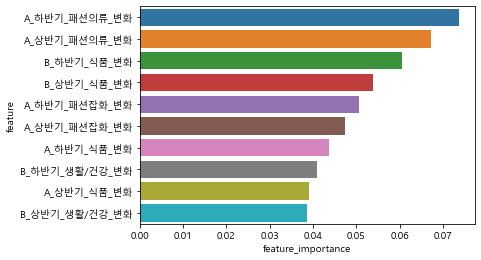

In [ ]:
rf_clf_importance = pd.DataFrame(rf_clf.feature_importances_, index=X_data.columns, columns=['feature_importance']).reset_index().rename(columns={'index':'feature'})
sns.barplot(x='feature_importance', y='feature', data=rf_clf_importance.sort_values(by='feature_importance', ascending=False).head(10), orient='h')

<AxesSubplot:xlabel='feature_importance', ylabel='feature'>

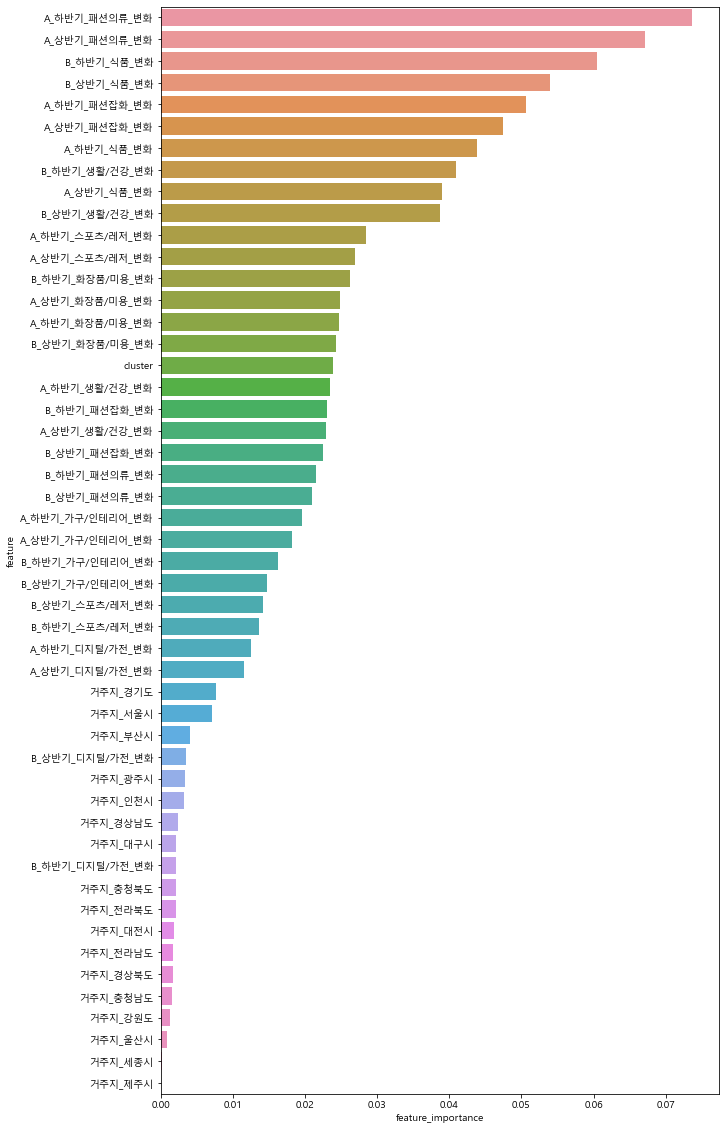

In [ ]:
plt.figure(figsize=(10,20))
rf_clf_importance = pd.DataFrame(rf_clf.feature_importances_, index=X_data.columns, columns=['feature_importance']).reset_index().rename(columns={'index':'feature'})
sns.barplot(x='feature_importance', y='feature', data=rf_clf_importance.sort_values(by='feature_importance', ascending=False), orient='h')